In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA ## Principal component analysis
from sklearn.preprocessing import StandardScaler ## Estandarizar datos, media 0 varianza 1

El objetivo es reducir las columnas con un ACP pero excluyendo la variable Swarm_Behaviour que es la variable objetivo de clasificación.
Se debe presentar un archivo .ipynb con los siguientes pasos:
Discusión sobre la matriz de correlación
Número de componentes seleccionados
Es posible visualizar el ACP?
Cuánto fue la reducción de tamaño y cuánto la perdida de información?


 Context: Flocking behaviour refers to the way that groups of birds, insects, fish, or other animals, move close to each other. They are able to move as a group with the same velocity, yet without running into each other. Task: Binary Classification, classify the behaviour of the swarm. Class labels are binary, which 1 refers to flocking, grouped, and aligned, and 0 refers to not flocking, not grouped, and not aligned. 1. Target Variable: Swarm_Behaviour 2. Data Type: High Dimensional 3. Classification Type: Binary Classificarion

Segundo punto. Tome una foto de su ventana y realice la reducción por ACP y conteste:

Número de componentes seleccionados
Imagen reconstruida
Cuánto fue la reducción de tamaño y cuánto la perdida de información?

Link base de datos:(https://www.kaggle.com/datasets/deepcontractor/swarm-behaviour-classification?select=Swarm_Behaviour.csv o en  http://archive.ics.uci.edu/dataset/524/swarm+behaviour)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# #1. ACP Swarm Behaviour

In [ ]:
datos = pd.read_csv("/content/drive/MyDrive/MAESTRIA/ESTADISTICA/Taller 2 - ACP/Swarm_Behaviour.csv")

In [ ]:
datos.shape

(23309, 2401)

In [ ]:
datos.head(5)

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [ ]:
df = datos

Selección de variables numericas

In [ ]:
df = df.drop('Swarm_Behaviour', axis = 1)

##1.1 Matriz de correlación

<Axes: >

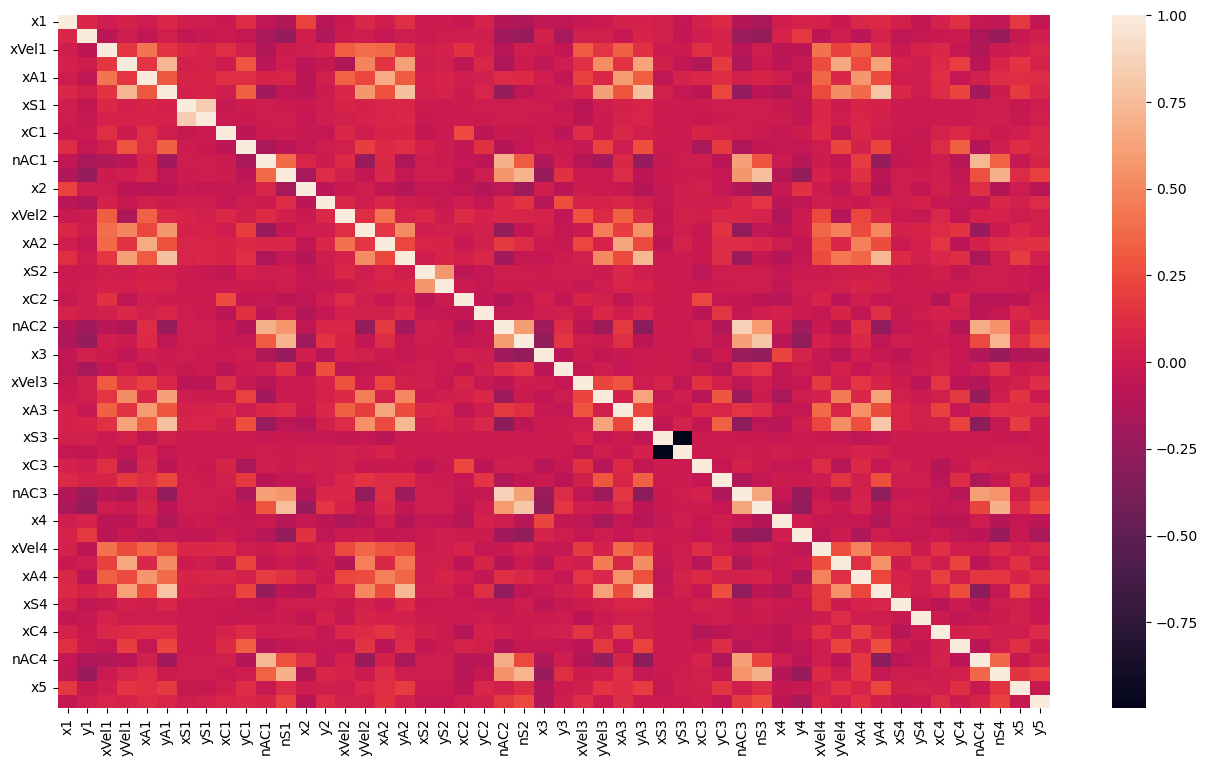

In [ ]:
covarianza=df.iloc[:, 0:50].cov()
corre=df.iloc[:, 0:50].corr()

sns.heatmap(corre)

Se observa que la matriz de correlación presenta cierto patrón de rectangulos con correlaciones aproximadamente superiores al 50%. Esto, junto a la amplia cantidad de campos de la base de datos (2400 campos) refuerzan la idea de implementar un análisis de componentes principales (ACP) para reducir la dimensión y obtener resultados significativos con una perdida de información que no tenga un gran impacto sobre los resultados.

##1.2 Estandarización

In [ ]:
escala=StandardScaler()
escala.fit(df)  ## Calcula las medias y las desviaciones
df1 = escala.transform(df) # Transforma los datos
pd.DataFrame(df1, index=df.index, columns=df.columns)

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,0.542749,0.127088,-1.556138,-0.596135,0.393447,-0.258311,0.040008,0.035368,0.062384,-0.122717,...,-1.080660,-1.983090,0.333339,-0.223453,0.020652,0.016978,0.022316,-0.138428,0.045876,-0.286699
1,0.084497,0.028591,0.467913,-0.370793,0.393447,-0.258311,0.040008,0.035368,0.062384,-0.122717,...,1.962187,-0.464226,0.333339,-0.223453,0.020652,0.016978,0.022316,-0.138428,-0.657207,-0.286699
2,0.113554,-0.430108,0.732393,-0.873062,0.393447,-0.258311,0.040008,0.035368,0.383997,-0.536424,...,-1.077294,-1.232118,0.333339,-0.223453,0.020652,0.016978,-0.175835,-0.626558,-0.334960,-0.152142
3,0.252112,-1.453573,0.240771,1.236465,-0.058596,1.491694,0.040008,0.035368,0.062384,-0.122717,...,-0.306484,1.340970,-0.353000,1.546685,0.020652,0.016978,0.022316,-0.138428,-0.305665,-0.286699
4,1.391475,1.712877,-0.205733,1.108862,-2.265629,1.440723,0.040008,0.035368,0.062384,-0.122717,...,2.037922,1.799102,-2.306426,-0.223453,0.064088,2.254685,0.022316,-0.138428,-0.422846,-0.286699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-0.391687,0.353159,2.005010,-1.034602,-2.265629,-0.258311,0.040008,0.035368,0.062384,-0.122717,...,-1.363402,-0.669865,-2.306426,-1.976065,-0.033338,0.046966,0.022316,-0.138428,-0.276370,-0.152142
23305,-1.727306,-0.278290,-0.025265,-0.601565,0.207312,-1.192780,0.040008,0.035368,0.562671,-0.090894,...,0.824486,-1.626476,-0.062625,-1.450282,0.020652,0.016978,0.058344,-0.024530,1.246977,-0.152142
23306,-1.737494,-1.229037,-0.341085,-0.167171,0.393447,-0.258311,0.040008,0.035368,0.062384,-0.122717,...,-1.047000,-1.934934,0.333339,-0.223453,0.020652,0.016978,0.022316,-0.138428,-0.188485,-0.152142
23307,1.046863,1.202078,-0.764254,-0.404730,-2.265629,-1.957345,0.040008,0.035368,0.062384,-0.122717,...,-0.015327,1.261578,-2.306426,-1.976065,0.020652,0.016978,0.022316,-0.138428,0.075171,-0.286699


##1.3 Implementación PCA

Para la implementación del modelo se ha determinado que el ACP debe tener un numero de componentes que esten en la capacidad de explicar el 80% de la varianza de los datos originales.

In [ ]:
ACPModel = PCA(0.8) # Determinamos que el modelo tenga una varianza explicada del 80%.
ACPModel.fit(df1) # Ajustamos el PCA a los datos estandarizados
ACPTransform = ACPModel.transform(df1) # Creamos nuevos datos con los componentes

In [ ]:
print(f'Se observa que al establecer una varianza explicada del 80%,\n'
      f'el modelo ACP ha seleccionado en total {len(ACPModel.components_)} componentes.\n'
      f'Esto representa una reducción de {2400-234} campos, con una perdida de información del 20%')

Se observa que al establecer una varianza explicada del 80%,
el modelo ACP ha seleccionado en total 234 componentes.
Esto representa una reducción de 2166 campos, con una perdida de información del 20%


In [ ]:
ACPTransform

array([[-10.79425098,  -0.10470273, -10.59618843, ...,   0.06691286,
          0.52902016,   1.85957265],
       [ -0.77735445,  -4.39276533,  -7.40303112, ...,  -0.20524591,
         -0.14765184,  -0.77928868],
       [ -4.02338516,  -5.84605964, -11.41879431, ...,  -1.12119439,
         -0.1730269 ,   0.68455741],
       ...,
       [-11.36806075,   0.05604528, -10.78260178, ...,  -0.40962386,
          1.36364578,   2.02959655],
       [-24.98493797, -19.90733634,  15.15735245, ...,   1.26638242,
         -1.11412861,  -0.51342643],
       [ -2.67435753,  -7.0530078 ,  -8.66911857, ...,   0.46433579,
         -0.24216482,  -1.98630304]])

In [ ]:
ACPModel.components_ # Ecuaciones de cada componente

array([[ 0.00634051,  0.00531581,  0.01508289, ...,  0.01610486,
        -0.02062162, -0.00699636],
       [-0.00358034, -0.01492967,  0.00863247, ...,  0.00365339,
         0.04785213,  0.03984193],
       [-0.00729442, -0.00810472, -0.02789734, ...,  0.00551364,
         0.0100845 ,  0.0311064 ],
       ...,
       [-0.02762261, -0.02176688, -0.0127716 , ..., -0.02280412,
        -0.01127962, -0.03629514],
       [-0.00168276,  0.04366834, -0.00754688, ...,  0.01239546,
         0.00716378, -0.00034782],
       [-0.00541117,  0.00191639,  0.01443244, ...,  0.00916203,
         0.00398894, -0.02513242]])

In [ ]:
ACPModel.explained_variance_ # Valores propios

array([334.33878795, 272.2816406 , 129.26135074,  67.03030049,
        40.05246742,  34.48389327,  26.22988868,  20.57941122,
        19.98240768,  17.28726322,  16.9514987 ,  15.92416379,
        13.33564331,  13.04924747,  12.43294783,  11.98969407,
        11.35104482,  11.04422403,  10.93313286,  10.6508772 ,
        10.19666329,   9.83685171,   9.70470777,   9.56214374,
         9.44373283,   9.35388181,   9.19557245,   9.06752059,
         8.93822279,   8.82749346,   8.58936027,   8.54018608,
         8.49454819,   8.31586326,   8.20975453,   7.98576072,
         7.90690017,   7.85136883,   7.76941343,   7.62743015,
         7.52824084,   7.407572  ,   7.34627238,   7.21365177,
         7.10954852,   7.02307537,   6.92775533,   6.85195347,
         6.69370995,   6.68060628,   6.53207175,   6.42154822,
         6.28111165,   6.19241892,   6.07092166,   5.98214   ,
         5.86207618,   5.84669862,   5.71960197,   5.70017034,
         5.65977678,   5.62933265,   5.59909277,   5.49

In [ ]:
ACPModel.explained_variance_ratio_ # Porcentajes de varianza explicada de cada componente

array([0.13930185, 0.11344582, 0.05385659, 0.02792809, 0.01668781,
       0.01436767, 0.01092865, 0.00857439, 0.00832565, 0.00720272,
       0.00706282, 0.00663478, 0.00555628, 0.00543695, 0.00518017,
       0.00499549, 0.0047294 , 0.00460156, 0.00455528, 0.00443768,
       0.00424843, 0.00409851, 0.00404345, 0.00398406, 0.00393472,
       0.00389728, 0.00383132, 0.00377797, 0.0037241 , 0.00367796,
       0.00357875, 0.00355826, 0.00353924, 0.00346479, 0.00342058,
       0.00332726, 0.0032944 , 0.00327126, 0.00323712, 0.00317796,
       0.00313663, 0.00308636, 0.00306082, 0.00300556, 0.00296218,
       0.00292616, 0.00288644, 0.00285486, 0.00278893, 0.00278347,
       0.00272158, 0.00267553, 0.00261702, 0.00258006, 0.00252944,
       0.00249245, 0.00244243, 0.00243602, 0.00238307, 0.00237497,
       0.00235814, 0.00234545, 0.00233286, 0.00228941, 0.0022663 ,
       0.00223676, 0.00221689, 0.00218611, 0.00213828, 0.00212904,
       0.00209056, 0.0020756 , 0.00206978, 0.0020473 , 0.00202

In [ ]:
ACPModel.explained_variance_ratio_[0:10].sum()

0.4006192332985698

In [ ]:
ACP=[]
for i in range(0, len(ACPModel.components_)):
  x=["PC", str(i+1)]
  a="".join(x)
  ACP.append(a)

Pca_Tra = pd.DataFrame(ACPTransform, index=datos['Swarm_Behaviour'], columns=ACP)
Pca_Tra

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC225,PC226,PC227,PC228,PC229,PC230,PC231,PC232,PC233,PC234
Swarm_Behaviour,,,,,,,,,,,,,,,,,,,,,
0.0,-10.794251,-0.104703,-10.596188,-2.113457,-2.063050,13.367270,0.574539,-0.292073,0.040566,-1.009526,...,-2.272083,0.122609,-0.524724,-0.198726,-1.078181,-0.088909,-0.094836,0.066913,0.529020,1.859573
0.0,-0.777354,-4.392765,-7.403031,3.899979,-1.917847,3.232093,-10.604317,3.448247,-0.030991,2.473297,...,0.390230,-0.213671,-1.631725,0.056981,-1.938933,0.658781,0.681016,-0.205246,-0.147652,-0.779289
0.0,-4.023385,-5.846060,-11.418794,11.522286,4.946352,-1.579305,12.777153,1.182003,-1.415620,0.903477,...,1.582579,-0.163666,0.425733,-0.092591,1.142306,0.617518,0.988660,-1.121194,-0.173027,0.684557
0.0,26.760697,-2.292499,6.022552,-4.372140,10.714029,2.410342,-1.995572,-0.868213,-2.098732,2.137429,...,-0.171441,1.504058,-0.689485,0.505015,0.822513,-0.349937,0.252252,-0.170672,0.886081,0.692113
0.0,-16.254902,-19.169406,17.489236,-2.301257,1.813060,-5.077923,1.154785,5.549737,-4.572445,-1.620250,...,0.490002,1.097959,-0.173343,-0.222677,0.537733,1.056396,0.582572,0.038874,0.494693,-0.335061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0,-25.202757,-15.817568,5.297169,2.505077,-4.919939,-9.439402,-4.361975,2.033818,-1.132812,-2.635776,...,2.980792,1.106184,-0.918895,4.152237,-1.994126,-1.981369,-0.790973,2.427673,7.272988,1.127418
0.0,-26.891848,9.694574,-11.306427,-17.258397,-2.534095,-2.764927,1.569119,2.068447,-5.076360,-1.386066,...,1.450208,0.651772,-0.590852,1.835075,1.584973,0.972659,-0.075252,0.220412,0.963168,-0.034800
0.0,-11.368061,0.056045,-10.782602,-2.142348,-2.639472,14.472641,1.048173,-1.223164,-0.910572,-0.582758,...,-2.441245,-0.586056,-1.221959,-0.436367,-0.660143,-0.374901,-0.454258,-0.409624,1.363646,2.029597


In [ ]:
#print(ACPModel.explained_variance_ratio_)
y=range(1,len(ACPModel.components_)+1)
fig=px.line(x=y, y=np.cumsum(ACPModel.explained_variance_ratio_))
fig.show()

In [ ]:
cargas = ACPModel.components_.T * np.sqrt(ACPModel.explained_variance_)
variables=df.columns

fig = px.scatter(ACPTransform, x=0, y=1, hover_name=df.index,
                 width=1.5*730,
               height=1.5*225) #,text=df.index)

for i, feature in enumerate(variables):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=cargas[i, 0],
        y1=cargas[i, 1]
    )
    fig.add_annotation(
        x=cargas[i, 0],
        y=cargas[i, 1],
        ax=0, ay=0,
        xanchor="left",
        yanchor="bottom",
        text=feature,
    )
fig.show()

Si bien es posible generar el gráfico del modelo ACP, visualmente no se detalla información que pueda generar valor en las conclusiones estadisticas del modelo. En consecuencia, en este caso es mejor valerse de los resultados cuantitativos del modelo y omitir el análisis gráfico.

# #2. Compresión de imagenes

In [ ]:
from skimage import io
from skimage import color
from matplotlib import image
url="/content/drive/MyDrive/MAESTRIA/ESTADISTICA/Taller 2 - ACP/image.jpg"
imagen=io.imread(url)

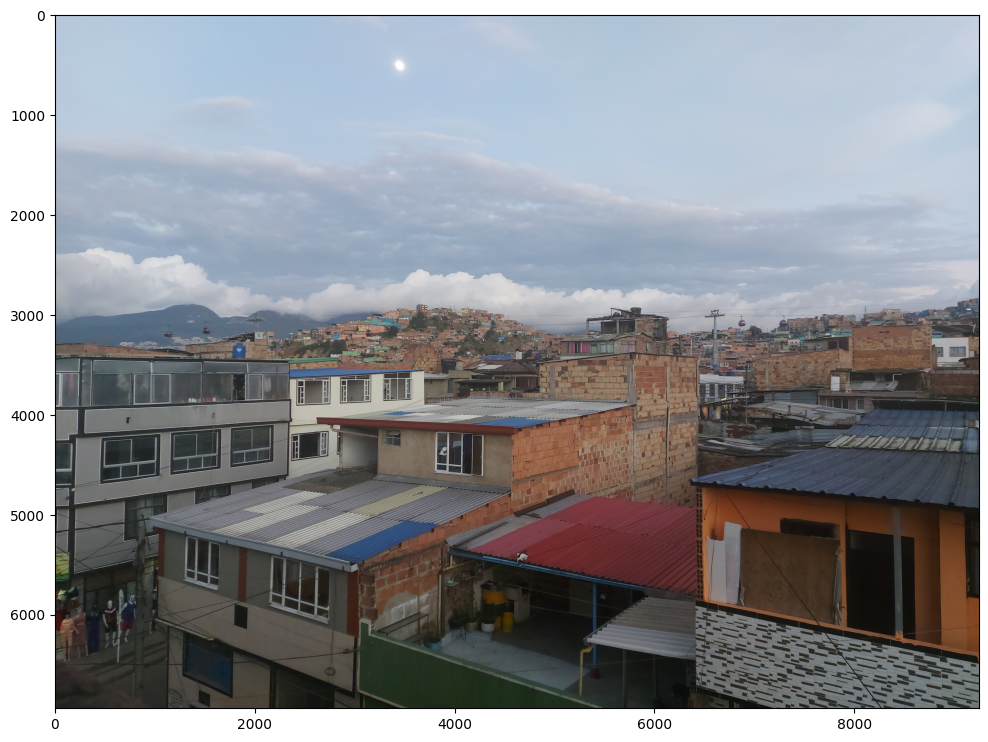

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.imshow(imagen)

In [ ]:
imagen.shape

(6936, 9248, 3)

##2.1 Transformación a escala de grises

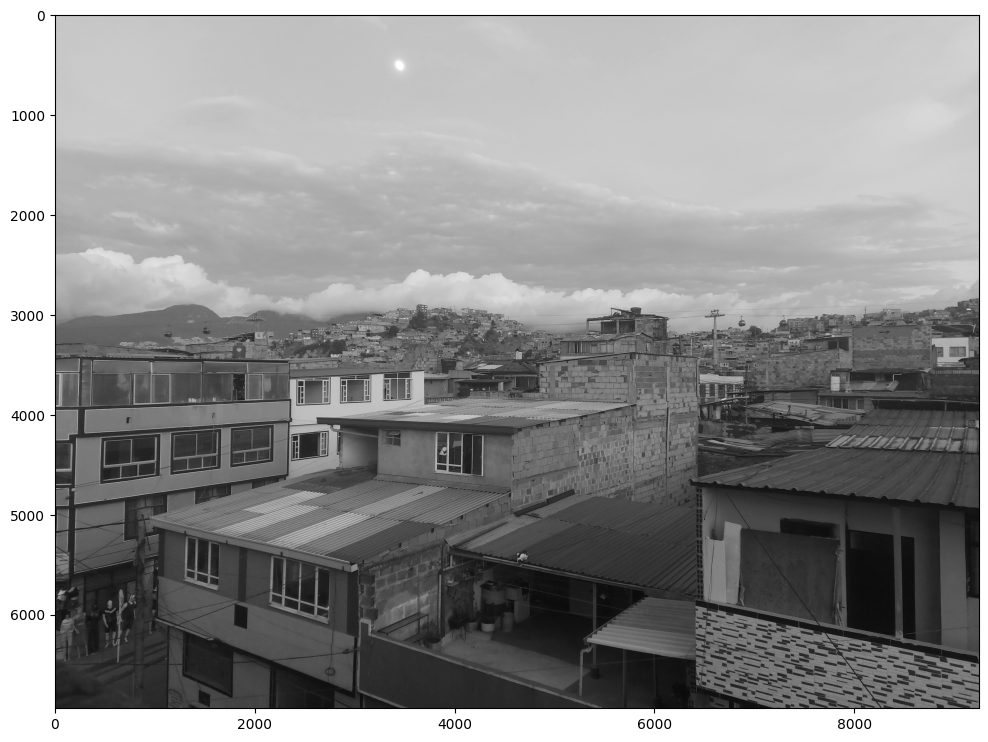

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
imagengris=color.rgb2gray(imagen)  ## Escala de grises 0.299 Reds + 0.587 Greens + 0.114 Blue (estos pesos se obtienen por medio de un ACP)
plt.imshow(imagengris, cmap='gray')

In [ ]:
imagengris.shape

(6936, 9248)

In [ ]:
IMGris=pd.DataFrame(imagengris)
IMGris # dataframe de la imagen

,0,1,2,3,4,5,6,7,8,9,...,9238,9239,9240,9241,9242,9243,9244,9245,9246,9247
0,0.767959,0.764037,0.760116,0.764037,0.771880,0.775802,0.771880,0.764037,0.771880,0.764037,...,0.797307,0.801228,0.797307,0.805150,0.809071,0.801228,0.789464,0.789464,0.801228,0.809071
1,0.775802,0.767959,0.764037,0.764037,0.771880,0.775802,0.775802,0.771880,0.779724,0.764037,...,0.793385,0.797307,0.801228,0.801228,0.801228,0.801228,0.797307,0.797307,0.797307,0.801228
2,0.775802,0.771880,0.764037,0.767959,0.771880,0.775802,0.775802,0.771880,0.771880,0.760116,...,0.793385,0.797307,0.801228,0.797307,0.797307,0.805150,0.805150,0.797307,0.789464,0.785542
3,0.771880,0.767959,0.767959,0.771880,0.775802,0.775802,0.767959,0.764037,0.756194,0.756194,...,0.797307,0.801228,0.805150,0.797307,0.797307,0.809071,0.809071,0.797307,0.785542,0.781620
4,0.767959,0.764037,0.767959,0.771880,0.775802,0.771880,0.767959,0.764037,0.752273,0.756194,...,0.805150,0.805150,0.805150,0.801228,0.801228,0.809071,0.809071,0.797307,0.789464,0.785542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,0.124933,0.128854,0.144540,0.152384,0.152384,0.156305,0.152384,0.136697,0.148462,0.168070,...,0.476490,0.484333,0.480411,0.476490,0.480411,0.488255,0.476490,0.456882,0.449039,0.456882
6932,0.140619,0.136697,0.140619,0.148462,0.156305,0.168070,0.164148,0.140619,0.144540,0.168070,...,0.480411,0.484333,0.480411,0.480411,0.488255,0.496098,0.488255,0.472568,0.468647,0.472568
6933,0.156305,0.140619,0.132776,0.136697,0.144540,0.152384,0.152384,0.132776,0.132776,0.156305,...,0.480411,0.472568,0.480411,0.472568,0.480411,0.496098,0.500019,0.488255,0.476490,0.476490
6934,0.152384,0.136697,0.132776,0.136697,0.136697,0.136697,0.136697,0.128854,0.128854,0.144540,...,0.472568,0.468647,0.480411,0.472568,0.476490,0.488255,0.488255,0.476490,0.468647,0.472568


<Axes: >

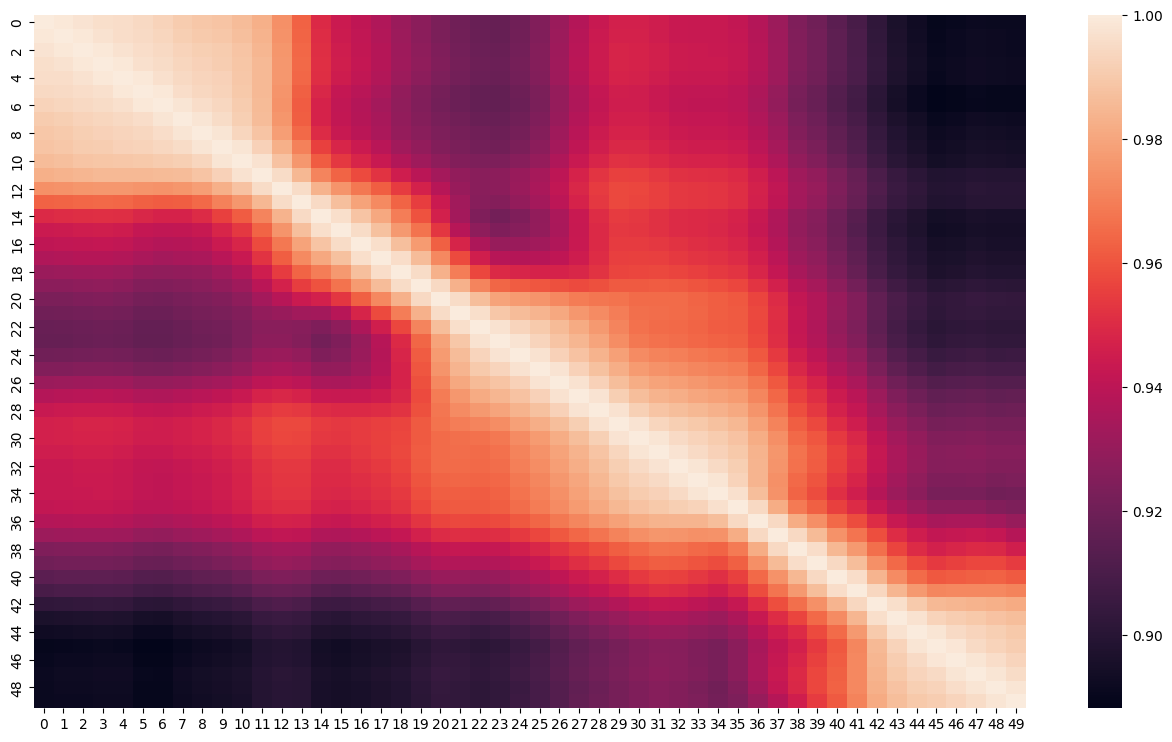

In [ ]:
corre= IMGris.iloc[:, 0:50].corr()
sns.heatmap(corre, annot=False)

##2.2 Implementación ACP


Se establece un ACP con 50 componentes:

In [ ]:
escala=StandardScaler(with_std=False) ### Estandariza sin la varianza (mantener la imagen) solo la centra en 0
### No vamos a tocar la varianza
escala.fit(IMGris) ## Centramos en 0
DD=escala.transform(IMGris) ### La _nueva_imagen
IMPca=PCA(n_components=50) ### Le voy a pedir 50 componentes
IMPca.fit(DD) ## Ajusto ese ACP
a=len(IMPca.components_)+1
y=range(1,a)
fig=px.line(x=y, y=np.cumsum(IMPca.explained_variance_ratio_))
fig.show() ### Muestre la varianza acumulada

Se observa que las 50 componentes explican hasta un 96% de la varianza. Lo cual implica una perdida de información del 4%.

In [ ]:
Y=IMPca.transform(DD)### Las nuevas 5 componentes (datos transformados) Frankestein
Y.shape

(6936, 50)

In [ ]:
Y # Tiene una longitud de 6936X1

array([[-2.58197285e+01,  1.02109232e-01, -1.01151568e+00, ...,
        -4.23636400e-02, -9.47709882e-02,  1.83589721e-02],
       [-2.58717945e+01,  1.20292669e-01, -1.01802608e+00, ...,
        -3.10275084e-02, -7.66601855e-02,  2.52515947e-02],
       [-2.58395353e+01,  1.23085918e-01, -1.03173825e+00, ...,
        -3.59078333e-02, -6.97136586e-02,  1.47931493e-02],
       ...,
       [ 2.67048030e+01, -9.70689385e+00,  2.03636468e+00, ...,
        -7.16059430e-01,  1.04323278e+00,  2.19423807e-01],
       [ 2.67185269e+01, -9.71588012e+00,  2.06500965e+00, ...,
        -6.51904085e-01,  8.51246271e-01,  1.67033413e-01],
       [ 2.66809873e+01, -9.71620997e+00,  2.10233272e+00, ...,
        -6.55643280e-01,  8.52026638e-01,  1.81881826e-01]])

In [ ]:
W=IMPca.components_ ### Los 5 vectores propios (ecuaciones)
W.shape  ## 5 ecuaciones, cada una con el valor de las 6936 columnas
W

array([[-1.04808745e-02, -1.04737331e-02, -1.04653311e-02, ...,
        -1.13522138e-02, -1.13594865e-02, -1.13458338e-02],
       [ 1.13434084e-03,  1.12182850e-03,  1.09784077e-03, ...,
        -1.94818918e-02, -1.94303944e-02, -1.93321893e-02],
       [ 5.88701408e-04,  6.28740693e-04,  8.20663215e-04, ...,
        -5.08800390e-03, -5.01213671e-03, -5.10890189e-03],
       ...,
       [-1.58902170e-02, -1.59873716e-02, -1.58899506e-02, ...,
        -1.23052322e-02, -1.13264645e-02, -1.14700801e-02],
       [ 2.07326432e-04,  4.80316103e-05,  7.53576866e-04, ...,
        -7.96606570e-03, -7.72394080e-03, -7.71597809e-03],
       [-1.23219021e-02, -1.18019894e-02, -1.14440589e-02, ...,
        -1.03976998e-02, -9.27676191e-03, -8.88848449e-03]])

In [ ]:
media=np.array(IMGris.mean()) ### Los promedios originales, los promedios en escala de gris de cada columna
media.shape # Tiene una dimensión de 9248X1

(9248,)

## 2.3 Reconstrucción de la imagen

In [ ]:
IResta=np.dot(Y,W)
IResta.shape
for i in range(IResta.shape[0]):
  IResta[i,:]=IResta[i,:]+media
IResta.shape

(6936, 9248)

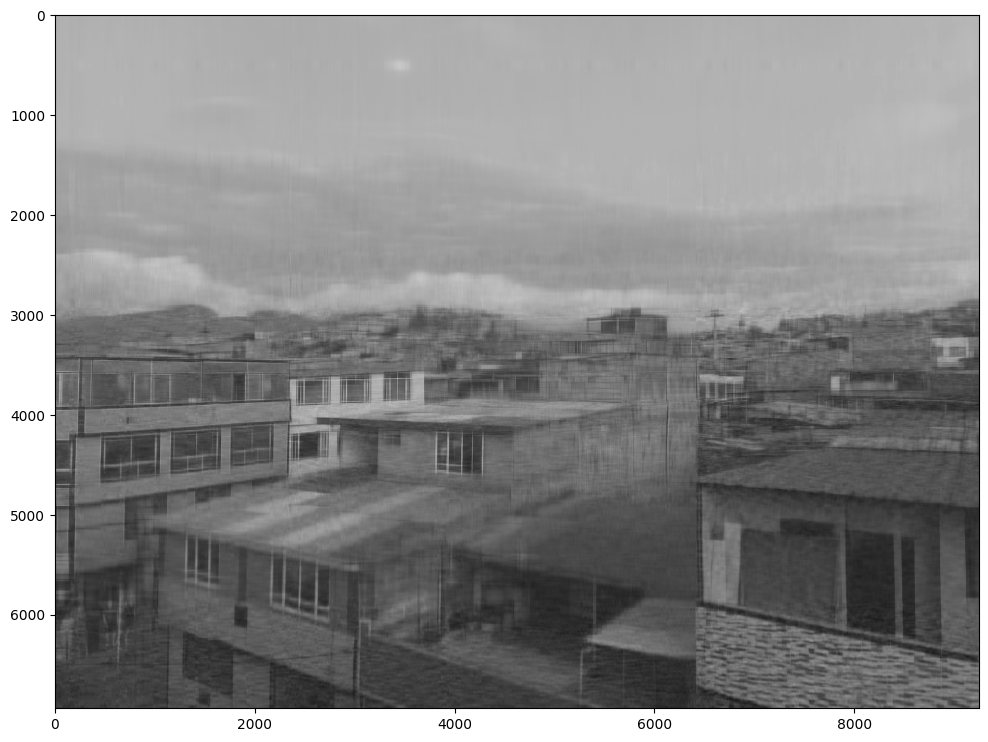

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.imshow(IResta, cmap='gray')